In [1]:
import arviz
import pymc
import pandas as pd
import numpy as np
from causalgraphicalmodels import CausalGraphicalModel
import seaborn as sns

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


6E1. **List three mechanisms by which multiple regression can produce false inferences about causal effects.**
- post treatment bias,
- collider bias
-  multicolinearity

6M1. **Modify the DAG on page 186 to include the variable V, an unobserved cause of C and Y: C ← V → Y Reanalyze the DAG. How many paths connect X to Y? Which must be closed? Which variables should you condition on now?**

In [2]:
dag = CausalGraphicalModel(nodes = ['X',"Y","U","A","B","C","V"], 
                edges = [
                    ("X","Y"),
                    ("U","X"),
                    ('U',"B"),
                    ('A',"U"),
                    ('A',"C"),
                    ("V","C"),
                    ("V","Y"),
                    ('C',"B"),
                    ('C',"Y")])

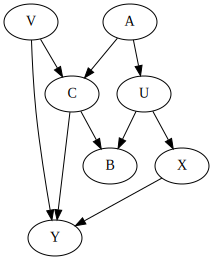

In [3]:
dag.draw()

In [9]:
backdoor_path = dag.get_all_backdoor_paths("X","Y")
backdoor_path

[['X', 'U', 'B', 'C', 'Y'],
 ['X', 'U', 'B', 'C', 'V', 'Y'],
 ['X', 'U', 'A', 'C', 'Y'],
 ['X', 'U', 'A', 'C', 'V', 'Y']]

In [10]:
backdoor_adju = dag.get_all_backdoor_adjustment_sets("X", "Y")
backdoor_adju

frozenset({frozenset({'B', 'C', 'V'}),
           frozenset({'U', 'V'}),
           frozenset({'C', 'U'}),
           frozenset({'C', 'U', 'V'}),
           frozenset({'B', 'U', 'V'}),
           frozenset({'A'}),
           frozenset({'A', 'C'}),
           frozenset({'B', 'U'}),
           frozenset({'B', 'C', 'U'}),
           frozenset({'B', 'C', 'U', 'V'}),
           frozenset({'A', 'V'}),
           frozenset({'C', 'V'}),
           frozenset({'A', 'B', 'U', 'V'}),
           frozenset({'A', 'C', 'V'}),
           frozenset({'A', 'U'}),
           frozenset({'A', 'B', 'U'}),
           frozenset({'A', 'B', 'C'}),
           frozenset({'A', 'C', 'U'}),
           frozenset({'A', 'B', 'C', 'U'}),
           frozenset({'A', 'U', 'V'}),
           frozenset({'A', 'B', 'C', 'V'}),
           frozenset({'U'}),
           frozenset({'A', 'C', 'U', 'V'}),
           frozenset({'A', 'B', 'C', 'U', 'V'})})

In [11]:
all_independencies = dag.get_all_independence_relationships()
for s in all_independencies:
    if all(
        t[0] != s[0] or t[1] != s[1] or not t[2].issubset(s[2])
        for t in all_independencies
        if t != s
    ):
        print(s)

('C', 'U', {'A'})
('C', 'X', {'U'})
('C', 'X', {'A'})
('U', 'Y', {'A', 'X'})
('U', 'Y', {'C', 'X', 'V'})
('U', 'V', set())
('A', 'B', {'C', 'U'})
('A', 'Y', {'C', 'U', 'V'})
('A', 'Y', {'C', 'X', 'V'})
('A', 'X', {'U'})
('A', 'V', set())
('B', 'Y', {'C', 'U'})
('B', 'Y', {'C', 'A', 'X'})
('B', 'Y', {'C', 'X', 'V'})
('B', 'X', {'U'})
('B', 'V', {'C', 'U'})
('B', 'V', {'C', 'A'})
('X', 'V', set())


Paths from X to Y:
**five**
- X <-U <-A <-C <-V ->Y
- X <-U <-A <-C ->Y
- X -> Y
- X <-U -> B <-C <-V ->Y
- X <-U -> B <-C ->Y
